In [48]:
# rolling dice and rerolling the sames but now over all dice
import math
import random
from itertools import groupby

def roll(tot, n, trlls):
    thsrlls = []
    for i in range(n):
        thsrlls.append(random.randint(1, 6))
    thsrlls.sort()
    ctlst = [len(list(group)) for key, group in groupby(thsrlls)]
    ctlst.sort(reverse=True)
    tot += sum(thsrlls)
    trlls += n
    if ctlst[0] == 1: # no more multiples
        return (tot, trlls)
    if ctlst[0] == 2:
        return roll(tot, 2, trlls)
    if ctlst[0] > 2:
        return roll(tot, 3, trlls)

if __name__=="__main__":
    res = 0.
    resr = 0
    nlen = 1000000
    totr = 0
    for i in range(nlen):
        thisroll = roll(0, 3, 0)
        res += thisroll[0]
        totr += thisroll[1]
    print res / nlen

14.406398


In [77]:
# lcm
import math

def divisors(a): # divisors of a
    div = [1]
    for t in range(2,int(a/2)+1):
        if a % t == 0:
            div.append(t)
    div.append(a)
    return div

def pdivisors(a): # prime divisors of a
    div = [[1,a]]
    for t in range(2,int(a/2)+1):
        if a % t == 0:
            check = True
            for p in div:
                if t % p[0] == 0 and p[0] > 1:
                    check = False
                    pexp = math.log(t)/math.log(p[0])
                    if float(pexp).is_integer():
                        p[1] = int(pexp)
                    break
            if check:
                div.append([t,1])
    return div

def takeFirst(elem):
    return elem[0]

def lcm(a,b): # simple lowest common multiple
    divlcm = []
    divlcm += pdivisors(a)
    divlcm += pdivisors(b)
    divlcm.sort(key=takeFirst, reverse=True)
    resl = []
    lastel = divlcm[0]
    for el in divlcm:
        if el[0] != lastel[0]:
            resl.append(lastel)
        lastel = el
    res = 1
    for el in resl:
        res *= el[0]**el[1]
    return res

if __name__=="__main__":
    #print pdivisors(144)
    print lcm(33,144)

1584


In [6]:
# a triangle of numbers
import math

def nthrow(n): # n-th row in triangle
    res = [n]
    for k in range(2,n):
        res += [k*(n-k+1)]
    res += [n]
    return res
    
if __name__=="__main__":
    print nthrow(40)

[40, 78, 114, 148, 180, 210, 238, 264, 288, 310, 330, 348, 364, 378, 390, 400, 408, 414, 418, 420, 420, 418, 414, 408, 400, 390, 378, 364, 348, 330, 310, 288, 264, 238, 210, 180, 148, 114, 78, 40]


In [15]:
# a minimum
import math

def sss(x,y,z): # s
    return math.sqrt(x+2.) + math.sqrt(y+5.) + math.sqrt(z+10.)

def ttt(x,y,z): # t
    return math.sqrt(x+1.) + math.sqrt(y+1.) + math.sqrt(z+1.)

def stdist(x,y,z): # distance
    return sss(x,y,z)**2-ttt(x,y,z)**2
    
if __name__=="__main__":
    minv = 1000.
    mx = 0.
    my = 0.
    mz = 0.
    nsteps = 1000
    ds = 0.1
    for ix in range(nsteps):
        x = 0. + ix*ds
        for iy in range(nsteps):
            y = 0. + iy*ds
            for iz in range(nsteps):
                z = 0. + iz*ds
                thisv = stdist(x,y,z)
                if thisv < minv:
                    minv = thisv
                    mx = x
                    my = y
                    mz = z
    print('x: {0} y: {1} z: {2} = {3}'.format(mx, my, mz, minv))

x: 8.3 y: 36.2 z: 82.7 = 36.0


In [4]:
import itertools

print list(itertools.permutations('ABCD', 2))

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'A'), ('B', 'C'), ('B', 'D'), ('C', 'A'), ('C', 'B'), ('C', 'D'), ('D', 'A'), ('D', 'B'), ('D', 'C')]


In [8]:
# a 3x3 grid
import itertools

def pvalid(p): # is the given permutation valid?
    # a11, 12, 13, 21, 22, 23, 31, 32, 33
    # 0    1   2   3   4   5   6   7   8
    #      0   1   2   3   4   5   6
    if p[4]<p[1]: return False
    if p[4]<p[3]: return False
    if p[6]<p[3]: return False
    if p[6]<p[5]: return False
    if p[3]<p[0]: return False
    if p[3]<p[2]: return False
    if p[1]<p[0]: return False
    if p[5]<p[2]: return False
    return True

if __name__=="__main__":
    perm = list(itertools.permutations('2345678', 7))
    #perm = list(itertools.permutations('234', 2))
    ctr = 0
    for p in perm:
        if pvalid(p):
            ctr += 1
    print ctr

42


In [1]:
# a 2xn grid
import itertools

def pvalid(p): # is the given permutation valid?
    # 11, 12, 13, 21, 22, 23
    lp = len(p)/2
    for i in range(1,2*lp):
        #print('at {0} : {1} {2}'.format(i, p[i], p[i-1]))
        if i > lp:
            if p[i]<p[i-lp-1]: return False
            if p[i]<p[i-1]: return False
        if i < lp:
            if p[i]<p[i-1]: return False
    return True

if __name__=="__main__":
    perm = list(itertools.permutations('abcdefghij', 10))
    ctr = 0
    for p in perm:
        if pvalid(p):
            ctr += 1
    print ctr

132


In [12]:
# a 3x3 grid
import itertools

def gridchk(g): # returns the grid value check
    n = g[0] + g[1] + g[2]
    n0 = g[3] + g[4] + g[5]
    n1 = g[6] + g[7] + g[8]
    if n != n0 or n != n1 or n0 != n1:
        return False
    n0 = g[0] + g[3] + g[6]
    n1 = g[1] + g[4] + g[7]
    if n != n0 or n != n1 or n0 != n1:
        return False
    n0 = g[2] + g[5] + g[8]
    n1 = g[0] + g[4] + g[8]
    n2 = g[2] + g[4] + g[6]
    if n != n0 or n != n1 or n0 != n1:
        return False
    if n != n2:
        return False
    return True

if __name__=="__main__":
    vals = [4,5,6,7,9,10,11,12]
    perm = list(itertools.permutations(vals, 8))
    for p in perm:
        pchk = []
        pchk += p[:4]
        pchk.append(8)
        pchk += p[4:8]
        if gridchk(pchk):
            print pchk
            print sum(pchk)

[5, 10, 9, 12, 8, 4, 7, 6, 11]
72
[5, 12, 7, 10, 8, 6, 9, 4, 11]
72
[7, 6, 11, 12, 8, 4, 5, 10, 9]
72
[7, 12, 5, 6, 8, 10, 11, 4, 9]
72
[9, 4, 11, 10, 8, 6, 5, 12, 7]
72
[9, 10, 5, 4, 8, 12, 11, 6, 7]
72
[11, 4, 9, 6, 8, 10, 7, 12, 5]
72
[11, 6, 7, 4, 8, 12, 9, 10, 5]
72


In [6]:
# shuffling cards
import itertools

def shuffle(cards): # shuffle cards
    res = []
    for c in cards:
        if c % 2 == 0:
            res.append(len(cards)/2+c/2)
        else:
            res.append((c+1)/2)
    return res

if __name__=="__main__":
    #print shuffle([1,2,3,4,5,6,7,8])
    cards = [1,2,3,4,5,6,7,8]
    for i in range(4):
        print cards
        cards = shuffle(cards)

[1, 2, 3, 4, 5, 6, 7, 8]
[1, 5, 2, 6, 3, 7, 4, 8]
[1, 3, 5, 7, 2, 4, 6, 8]
[1, 2, 3, 4, 5, 6, 7, 8]


In [46]:
# Fibonacci divisibility
import math

def fib(n): # simple fibonacci
    fn1 = 0.
    fn2 = 1.
    for k in range(1,n+1):
        fn = fn1 + fn2
        fn2 = fn1
        fn1 = fn
    return fn

if __name__=="__main__":
    n = 500
    d = 125
    fn1 = 0
    fn2 = 1
    rests = []
    for k in range(1,n+1):
        fn = fn1 + fn2
        fn2 = fn1
        fn1 = fn
        rests.append(fn%d)
    #print rests
    #print sum(1 for x in rests if x==0)
    ratios = []
    for k in range(d):
        ratios.append(sum(1 for x in rests if x==k))
    print ratios

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [27]:
# sieve of Eratosthenes

def primes(n): # primes up to n via sieve
    res = range(2, n+1)
    idx = range(2, n+1)
    for k in res:
        for i in range(k, n, k):
            #print('k: {0} i: {1}'.format(k,i))
            if i % k == 0 and i > k:
                idx[i-2] = 0
    return idx

if __name__=="__main__":
    print primes(100)

[2, 3, 0, 5, 0, 7, 0, 0, 0, 11, 0, 13, 0, 0, 0, 17, 0, 19, 0, 0, 0, 23, 0, 0, 0, 0, 0, 29, 0, 31, 0, 0, 0, 0, 0, 37, 0, 0, 0, 41, 0, 43, 0, 0, 0, 47, 0, 0, 0, 0, 0, 53, 0, 0, 0, 0, 0, 59, 0, 61, 0, 0, 0, 0, 0, 67, 0, 0, 0, 71, 0, 73, 0, 0, 0, 0, 0, 79, 0, 0, 0, 83, 0, 0, 0, 0, 0, 89, 0, 0, 0, 0, 0, 0, 0, 97, 0, 0, 100]


In [66]:
# tennis players
import random

def playm(pl): # play first round and return winners
    random.shuffle(pl)
    winners = []
    for i in range(0,len(pl),2):
        if pl[i]>pl[i+1]:
            winners.append(pl[i])
        else:
            winners.append(pl[i+1])
    return winners

if __name__=="__main__":
    thisplyr = 5
    ctr = 0.
    nruns = 100000
    for i in range(nruns):
        pl = range(1,9)
        fm = playm(playm(pl))
        if thisplyr in fm:
            ctr += 1.
            #print fm
    print ctr/float(nruns)

0.1141086


In [57]:
# coin on grid
import random

def throwcoin(dg, rc): # throw a coin onto grid, return False if it touches the grid
    lwr = rc/2.
    upr = dg-lwr
    cx = random.uniform(0., dg)
    cy = random.uniform(0., dg)
    if cx >= lwr and cx <= upr:
        if cy >= lwr and cy <= upr:
            return True
    return False

if __name__=="__main__":
    ctr = 0.
    nruns = 100000
    for i in range(nruns):
        if throwcoin(2., 1.):
            ctr += 1.
    print ctr/float(nruns)

0.2482


In [67]:
lmin = 1000.
for a in range(1,16):
    for b in range(3,111):
        thisd = abs(float(a)/float(b)-0.1142)
        if thisd<lmin:
            lmin = thisd
            ma = a
            mb = b
print('a: {0} b: {1}'.format(ma,mb))

a: 4 b: 35


In [2]:
# 3x3 triangle grid
import itertools

# 13
# 12 22 32
# 11 21 31 41 51
# stored as 11 21 31 12 22 32 13
#           0  1  2  3  4  5  6 
def pvalid(p): # is the given permutation valid?
    if p[1]<p[0]: return False
    if p[2]<p[1]: return False
    if p[4]<p[3]: return False
    if p[5]<p[4]: return False
    if p[1]<p[3]: return False
    if p[4]<p[6]: return False
    return True

if __name__=="__main__":
    perm = list(itertools.permutations('1234567', 7))
    ctr = 0
    for p in perm:
        if pvalid(p):
            ctr += 1
    print ctr

52


In [4]:
# bouncing ball
import math

def impact(m0, m1, v00, v10): # impact of mass m0 on mass m1 (moving at v10) at velocity v00
    p0 = m0 * v00 + m1 * v10
    v11 = m0 * v00 / p0
    return [v11, m1 * v10 - m1 * v11]

if __name__=="__main__":
    #print impact(10., 1000., 10., 0.)
    m0 = 1.
    m1 = 1000000.
    v00 = 1.
    v10 = 0.
    df = 0.
    l0 = 1.
    l = l0
    niter = 400000000
    for i in range(niter):
        imp = impact(m0, m1, v00, v10)
        v10 = imp[0]
        dt = l / v00
        l += 2. * v10
        df += abs(imp[1] / dt)
    print v10
    print df / float(niter)
    print l
    print (math.log(df / float(niter))-math.log(m0*v00**2./l))/math.log(l0/l)

0.000999500125
0.00749481896429
799613.296233
-0.639965770874


In [166]:
# approximation
import math

def dnext(n): # next difference
    d0 = 0.713
    for i in range(n):
        d0 -= 0.038947/2.**i
    return d0

if __name__=="__main__":
    print dnext(600)

0.635106


In [2]:
# divisibility
import math

def mpown(n): # power n mod 30
    return (n**5-n)%30

if __name__=="__main__":
    for n in range(12):
        print mpown(n)

0
0
0
0
0
0
0
0
0
0
0
0


In [12]:
# ants in tubes

def hdlcoll(at): # handle collisions from ant tube at = [...,+1,+1,-1,...]
    cidx = at.index(-1) # find first ant moving left
    at[cidx-1] *= -1
    at[cidx] *= -1
    return at

if __name__=="__main__":
    #print hdlcoll([1,1,-1])
    collctr = 0
    ll = [1]*30
    rl = [-1]*20
    #print ll + rl
    at = ll + rl
    while len(at) > 0:
        at = hdlcoll(at)
        collctr += 1
        while at[0] < 0: # all left-movers at left tube end drop out
            del at[0]
        lat = len(at)-1
        while at[lat] > 0: # all right-movers at right tube end drop out
            del at[lat]
            lat -= 1
            if lat <= 0:
                break
        #print at
    print collctr

600


In [12]:
# random and floor
import math
import random

def func(x): # a function
    return math.floor((math.floor(x)+1.)/x)

if __name__=="__main__":
    nreps = 100000
    nok = 0
    for i in range(nreps):
        if func(random.uniform(0.000000001,1.)) <= 3.:
            nok += 1
    print float(nok)/float(nreps)

0.75116


In [34]:
# crossing out numbers

def cross(nl, even): # cross out even or odd numbers from list
    res = []
    for i in range(len(nl)):
        if even:
            if (i+1) % 2 != 0:
                res.append(nl[i])
        else:
            if (i+1) % 2 == 0:
                res.append(nl[i])
    return res

if __name__=="__main__":
    #print cross(range(1,101), False)
    nrg = 1000000
    la = range(1,nrg+1)
    res = cross(la, False)
    i = 0
    while len(res) > 1:
        if i%2 == 0:
            res = cross(res, True)
        else:
            res = cross(res, False)
        i += 1
    print res
    lb = range(1,nrg+1)
    res = cross(lb, True)
    i = 0
    while len(res) > 1:
        if i%2 == 0:
            res = cross(res, False)
        else:
            res = cross(res, True)
        i += 1
    print res

[349526]
[699051]


0.0144871855754


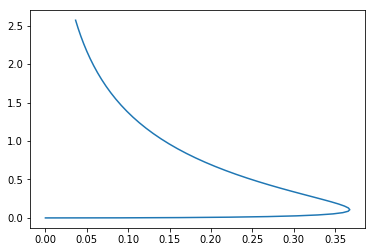

In [3]:
# a sprinkler
import math
import matplotlib.pyplot as plt

def fv(v, v0): # initial speed distribution
    vv0 = v / v0
    return vv0 / v0 * math.exp(-vv0)

def x0(theta, v0, g): # distance of droplet
    t0 = v0 / g * ( math.sqrt(math.sin(theta)**2.+1.) - math.sin(theta) )
    return 2. * t0 * v0 * math.cos(theta)

if __name__=="__main__":
    print x0( math.radians(30.), fv(1., 1.), 10.)
    #v = [float(n)/10. for n in range(0, 50)]
    v = [fv(float(n)/10., 1.) for n in range(0, 50)]
    #x = [x0( math.radians(30.), fv(float(n)/10., 1.), 10.) for n in range(0, 50)]
    x = [x0( math.radians(30.), float(n)/10., 10.) for n in range(0, 50)]
    _ = plt.plot(v, x, '-')
    plt.show()
    #print x

In [9]:
# a^b*b^a=n
import math

def abn(a,b):
    return a**b * b**a

if __name__=="__main__":
    resl = []
    nlim = 12
    for a in range(1,nlim):
        for b in range(a+1,nlim):
            resl.append(abn(a,b))
    print resl
    print len(resl)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 72, 256, 800, 2304, 6272, 16384, 41472, 102400, 247808, 5184, 30375, 157464, 750141, 3359232, 14348907, 59049000, 235782657, 640000, 5308416, 39337984, 268435456, 1719926784, 10485760000L, 61408804864L, 121500000, 1313046875, 12800000000L, 115330078125L, 976562500000L, 7863818359375L, 32934190464L, 440301256704L, 5355700839936L, 60466176000000L, 642717115324416L, 12089663946752L, 193010051319183L, 2824752490000000L, 38532504363714053L, 5777633090469888L, 107374182400000000L, 1841328767004311552L, 3486784401000000000L, 73994897046174912819L, 2593742460100000000000L]
55


In [34]:
# a convention
import random

def cagel(l,u,n):
    return [random.randint(l,u) for x in range(n)]

if __name__=="__main__":
    cl = []
    ctr = 0
    n = 100000
    for i in range(n):
        cl = cagel(20,60,20)
        smpl = cl[:4]
        smpl.sort(reverse=True)
        #print smpl
        #print cl[4:]
        #print random.choice(cl[4:])
        ed = random.choice(cl[4:])
        if smpl[2] > ed or smpl[3] > ed:
            ctr += 1
    print float(ctr) / float(n)

0.3877792


In [35]:
# approximation 2
import math

if __name__=="__main__":
    tgt = 0.3877792
    amin = 0
    bmin = 0
    dmin = 1000.
    for a in range(1,100):
        for b in range(1,100):
            diff = abs(tgt - float(a)/float(b))
            if diff < dmin:
                dmin = diff
                amin = a
                bmin = b
    print amin
    print bmin
    print float(amin) / float(bmin)

19
49
0.387755102041


In [8]:
# labelled integers
import itertools

def pvalid(p, np): # check for validity
    for n in range(np):
        #print n
        if (p[n]) < n:
            return False
        if n < (np-2):
            if (p[n+2]) <= (p[n]):
                return False
        if n < (np-1):
            if (p[n]) > (n+2):
                return False
    return True

if __name__=="__main__":
    np = 10
    perm = list(itertools.permutations(range(1,np+1), np))
    #print perm
    ctr = 0
    #perm = [(1,2,3)]
    #print perm
    for p in perm:
        #print list(p)
        if pvalid(list(p), np):
            ctr += 1
    print ctr

89
